## 下準備(importなど)

In [7]:
!pip install librosa


     -------------------------------------- 253.0/253.0 kB 5.2 MB/s eta 0:00:00
     ------------------------------------- 377.0/377.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.0/1.0 MB 12.8 MB/s eta 0:00:00
     ------------------------------------- 184.0/184.0 kB 10.9 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23736 sha256=3538a4c897be861dc39c10289775f7eb33051cd5027768f1033075fd20d1a2d7
  Stored in directory: c:\users\namatame\appdata\local\pip\cache\wheels\3d\e0\4b\51b8aa4a0e2b6361c14943f7a7c2c7adb7b9cd419e0a1b720d
Successfully built audioread


In [8]:
from IPython.display import Javascript
from base64 import b64decode
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

## 音声ファイル作成(wavファイル)

In [ ]:
RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

### 録音実行

In [ ]:
preaudiofile = "Vinyl-mine"#@param {type:"string"}
second = 20#@param {type:"number"}
print(f"Speak to your microphone {second} sec...")
audiofile = preaudiofile + '.wav'

record(second, audiofile)
print("Done!")

Speak to your microphone 20 sec...


<IPython.core.display.Javascript object>

Done!


<ipython-input-14-a307760a5f45>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  speech, rate = librosa.load(audiofile, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


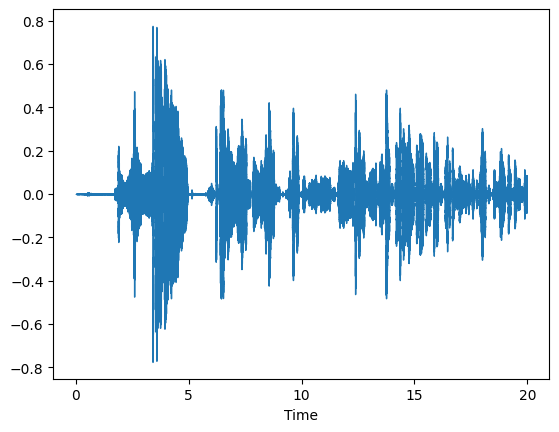

In [ ]:
# 波形プロットにより録音を確認
# UserWarning: PySoundFile failed. Trying audioread instead. が出るが、無視して問題ない
speech, rate = librosa.load(audiofile, sr=16000)
librosa.display.waveshow(speech, sr=rate)

## 音声分析

--2023-05-24 05:29:21--  https://github.com/Taka0007/2023-seminar-previous.term/raw/main/wav-files/aiueo.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Taka0007/2023-seminar-previous.term/main/wav-files/aiueo.wav [following]
--2023-05-24 05:29:21--  https://raw.githubusercontent.com/Taka0007/2023-seminar-previous.term/main/wav-files/aiueo.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32832 (32K) [audio/wav]
Saving to: ‘aiueo.wav’

aiueo.wav           100%[===================>]  32.06K  --.-KB/s    in 0.002s  

2023-05-24 05:29:21 (14.4 MB/s) - ‘aiueo.wav’ saved [32832/32832]



<ipython-input-2-66aa7e33b307>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  x, _ = librosa.load('/content/aiueo.wav', sr=SR)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


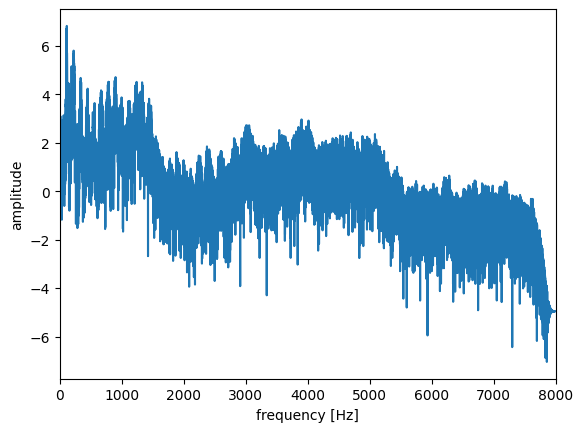

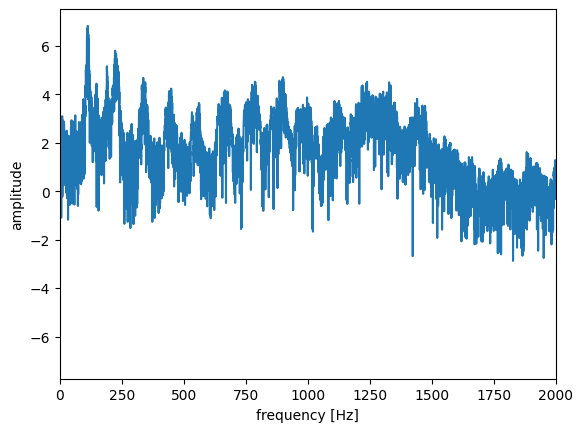

In [ ]:
#サンプリングレート
SR = 16000

# githubからファイルをDL
!wget https://github.com/Taka0007/2023-seminar-previous.term/raw/main/wav-files/aiueo.wav -O aiueo.wav

#音声ファイル(wavファイル)を読み込む
x, _ = librosa.load('/content/aiueo.wav', sr=SR)

#高速フーリエ変換
fft_spec = np.fft.rfft(x)

#複素スペクトル→対数振幅スペクトルに
fft_log_abs_spec = np.log(np.abs(fft_spec))


#スペクトルを描画
fig = plt.figure()
plt.xlabel('frequency [Hz]') # x軸のラベルを設定
plt.ylabel('amplitude') # y軸のラベルを設定
plt.xlim([0, SR/2]) 
x_data = np.linspace((SR/2)/len(fft_log_abs_spec), SR/2, len(fft_log_abs_spec))
plt.plot(x_data, fft_log_abs_spec)
plt.show()



# 横 軸 を0 ̃2000 H zに拡大
# xlimで表示の領域を変えるだけ
fig = plt.figure()
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')
plt.xlim([0, 2000])
plt.plot(x_data, fft_log_abs_spec)
# 表 示
plt.show()

### 音声再生

In [ ]:
# wavファイルを読み込む
file_path = '/content/aiueo.wav'
audio_data, sr = librosa.load(file_path)

# wavファイルを再生する
Audio(audio_data, rate=sr)

<ipython-input-3-e0f7dbcd9d0e>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


## 音程バー

<ipython-input-7-d1588ec3f29d>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


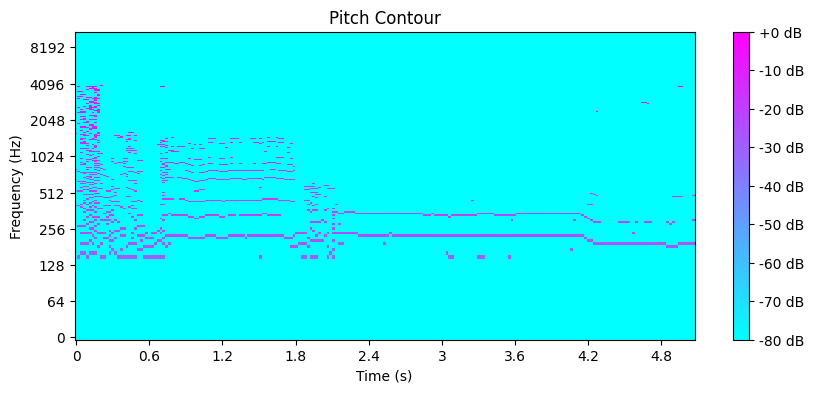

In [ ]:
# 音声ファイルのパス
audio_file = '/content/aiueo.wav'

# 音声ファイルの読み込み
audio_data, sr = librosa.load(audio_file)

# 音程の抽出
pitch, _ = librosa.piptrack(y=audio_data, sr=sr)


# 音声をセグメントに分割するパラメータ
segment_duration = 0.5  # セグメントの長さ（秒）
segment_hop = 0.1  # セグメントのオーバーラップ（秒）

# セグメントごとの音程を保存するリスト
all_pitch = []

# セグメントごとに音程を抽出して保存
for i in range(0, len(audio_data), int(segment_duration * sr)):
    segment = audio_data[i:i+int(segment_duration * sr)]
    pitch, _ = librosa.piptrack(y=segment, sr=sr)
    all_pitch.append(pitch)

# 音程情報を統合して表示
pitch_combined = np.concatenate(all_pitch, axis=1)

# 音程情報を対数スケールに変換して表示
pitch_log = librosa.amplitude_to_db(pitch_combined, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(pitch_log, sr=sr, x_axis='time', y_axis='log', cmap='cool', vmin=-80, vmax=0)

plt.title('Pitch Contour')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(format='%+2.0f dB')

plt.show()

## 参考資料

colab上で録音を行いwavファイルとして保存するプログラム
https://gist.github.com/tam17aki/8bfa2a42dab0061ee2641aed32dd1d30